In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH

from gptchem.plotsettings import *

%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
all_out

[{'accuracy': 0.32142857142857145,
  'acc_macro': 0.7285714285714284,
  'racc': 0.23692602040816327,
  'kappa': 0.11073965733389053,
  'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1, 2, 3, 4]),
  'f1_macro': 0.20966666666666667,
  'f1_micro': 0.32142857142857145,
  'frac_valid': 1.0,
  'all_y_true': (#56) [3,2,2,3,4,2,4,4,3,0...],
  'all_y_pred': (#56) [0,4,0,4,1,1,0,3,0,1...],
  'valid_indices': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55],
  'might_have_rounded_floats': False,
  'true': 0     3
  1     2
  2     2
  3     3
  4     4
  5     2
  6     4
  7     4
  8     3
  9     0
  10    2
  11    0
  12    0
  13    4
  14    0
  15    0
  16

In [6]:
extracted_res = []
xgboost_results = []
tabpfn_results = []
graph_conv_results = []
weave_results = []
esol_results = []

for out in all_out:
    try:
        res = {
            "train_size": out["train_size"],
            "frac_valid": out["frac_valid"],
            "accuracy": out["accuracy"],
            "f1_macro": out["f1_macro"],
            "f1_micro": out["f1_micro"],
            "kappa": out["kappa"],
            "num_classes": out["num_class"],
            "representation": out["representation"],
        }
        extracted_res.append(res)
    except KeyError as e:
        print(e)
        pass

    xgb_res = {
        "train_size": out["train_size"],
        "accuracy": out["xgb"]["accuracy"],
        "f1_macro": out["xgb"]["f1_macro"],
        "f1_micro": out["xgb"]["f1_micro"],
        "kappa": out["xgb"]["kappa"],
        "num_classes": out["num_class"],
    }

    tabpfn_res = {
        "train_size": out["train_size"],
        "accuracy": out["tabpfn"]["accuracy"],
        "f1_macro": out["tabpfn"]["f1_macro"],
        "f1_micro": out["tabpfn"]["f1_micro"],
        "kappa": out["tabpfn"]["kappa"],
        "num_classes": out["num_class"],
    }

    graph_conv_res = {
        "train_size": out["train_size"],
        "accuracy": out["graph_conv"]["accuracy"],
        "f1_macro": out["graph_conv"]["f1_macro"],
        "f1_micro": out["graph_conv"]["f1_micro"],
        "kappa": out["graph_conv"]["kappa"],
        "num_classes": out["num_class"],
    }

    weave_res = {
        "train_size": out["train_size"],
        "accuracy": out["weave"]["accuracy"],
        "f1_macro": out["weave"]["f1_macro"],
        "f1_micro": out["weave"]["f1_micro"],
        "kappa": out["weave"]["kappa"],
        "num_classes": out["num_class"],
    }

    esol_res = {
        "train_size": out["train_size"],
        "accuracy": out["esol"]["accuracy"],
        "f1_macro": out["esol"]["f1_macro"],
        "f1_micro": out["esol"]["f1_micro"],
        "kappa": out["esol"]["kappa"],
        "num_classes": out["num_class"],
    }

    graph_conv_results.append(graph_conv_res)
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)
    weave_results.append(weave_res)
    esol_results.append(esol_res)

'representation'


In [7]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)
graph_conv_res = pd.DataFrame(graph_conv_results)
weave_res = pd.DataFrame(weave_results)
esol_res = pd.DataFrame(esol_results)

In [8]:
grouped_res = res.groupby(["num_classes", "representation", "train_size"]).agg(
    ["mean", "std", sem, "count"]
)

In [9]:
grouped_xgboost_res = xgboost_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [10]:
grouped_tabpfn_res = tabpfn_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [11]:
grouped_graph_conv_res = graph_conv_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)

In [12]:
grouped_weave_res = weave_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [13]:
grouped_esol_res = esol_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [14]:
grouped_res.loc[2, :]

frac_valid                  accuracy            \
                                mean  std  sem count      mean       std   
representation train_size                                                  
InChI          10                1.0  0.0  0.0     3  0.666667  0.074345   
               20                1.0  NaN  NaN     1  0.678571       NaN   
               50                1.0  NaN  NaN     1  0.750000       NaN   
SELFIES        10                1.0  0.0  0.0     3  0.541667  0.116186   
               20                1.0  NaN  NaN     1  0.660714       NaN   
               50                1.0  NaN  NaN     1  0.821429       NaN   
SMILES         10                1.0  0.0  0.0     3  0.571429  0.053571   
               20                1.0  NaN  NaN     1  0.660714       NaN   
               50                1.0  NaN  NaN     1  0.857143       NaN   

                                           f1_macro                            \
                                sem count      mean       std       sem count   
representation train_size                                                       
InChI          10          0.042923     3  0.557188  0.149443  0.086281     3   
               20               NaN     1  0.657143       NaN       NaN     1   
               50               NaN     1  0.713450       NaN       NaN     1   
SELFIES        10          0.067080     3  0.461470  0.045352  0.026184     3   
               20               NaN     1  0.536383       NaN       NaN     1   
               50               NaN     1  0.761905       NaN       NaN     1   
SMILES         10          0.030929     3  0.480509  0.059689  0.034461     3   
               20               NaN     1  0.591868       NaN       NaN     1   
               50               NaN     1  0.825000       NaN       NaN     1   

                           f1_micro                               kappa  \
                               mean       std       sem count      mean   
representation train_size                                                 
InChI          10          0.666667  0.074345  0.042923     3  0.205615   
               20          0.678571       NaN       NaN     1  0.382353   
               50          0.750000       NaN       NaN     1  0.434343   
SELFIES        10          0.541667  0.116186  0.067080     3  0.099140   
               20          0.660714       NaN       NaN     1  0.198795   
               50          0.821429       NaN       NaN     1  0.536424   
SMILES         10          0.571429  0.053571  0.030929     3  0.074418   
               20          0.660714       NaN       NaN     1  0.265193   
               50          0.857143       NaN       NaN     1  0.658537   

                                                     
                                std       sem count  
representation train_size                            
InChI          10          0.204824  0.118255     3  
               20               NaN       NaN     1  
               50               NaN       NaN     1  
SELFIES        10          0.015712  0.009071     3  
               20               NaN       NaN     1  
               50               NaN       NaN     1  
SMILES         10          0.055988  0.032325     3  
               20               NaN       NaN     1  
               50               NaN       NaN     1

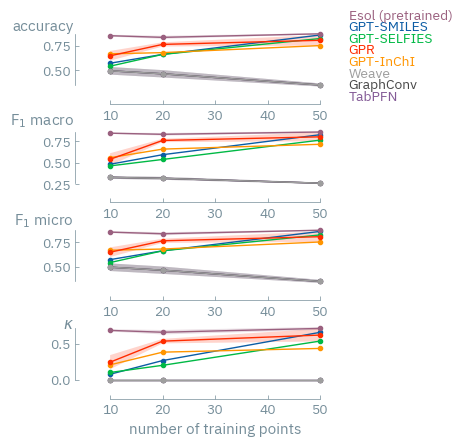

In [15]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "SMILES", :].index,
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        - grouped_res.loc[2, "SMILES", :][metric]["sem"],
        grouped_res.loc[2, "SMILES", :][metric]["mean"]
        + grouped_res.loc[2, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_res.loc[2, "SMILES", :].index,
        np.stack(
            [
                 grouped_res.loc[2, "SMILES", :][metric]["mean"],
                 grouped_res.loc[2, "SELFIES", :][metric]["mean"],
                 grouped_res.loc[2, "InChI", :][metric]["mean"],
                        grouped_xgboost_res.loc[2, :][metric]["mean"],
                            grouped_tabpfn_res.loc[2, :][metric]["mean"],
                grouped_graph_conv_res.loc[2, :][metric]["mean"],
                grouped_weave_res.loc[2, :][metric]["mean"], 
               grouped_esol_res.loc[2, :][metric]["mean"] 
            ]
        ).flatten()
    )

    ax[i].plot(
        grouped_res.loc[2, "SELFIES", :].index,
        grouped_res.loc[2, "SELFIES", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "SELFIES", :].index,
        grouped_res.loc[2, "SELFIES", :][metric]["mean"]
        - grouped_res.loc[2, "SELFIES", :][metric]["sem"],
        grouped_res.loc[2, "SELFIES", :][metric]["mean"]
        + grouped_res.loc[2, "SELFIES", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, "InChI", :].index,
        grouped_res.loc[2, "InChI", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "InChI", :].index,
        grouped_res.loc[2, "InChI", :][metric]["mean"]
        - grouped_res.loc[2, "InChI", :][metric]["sem"],
        grouped_res.loc[2, "InChI", :][metric]["mean"]
        + grouped_res.loc[2, "InChI", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        - grouped_xgboost_res.loc[2, :][metric]["sem"],
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        + grouped_xgboost_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"]
        - grouped_tabpfn_res.loc[2, :][metric]["sem"],
        grouped_tabpfn_res.loc[2, :][metric]["mean"]
        + grouped_tabpfn_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_graph_conv_res.loc[2, :].index,
        grouped_graph_conv_res.loc[2, :][metric]["mean"],
        marker="o",
        label="GraphConv",
    )
    ax[i].fill_between(
        grouped_graph_conv_res.loc[2, :].index,
        grouped_graph_conv_res.loc[2, :][metric]["mean"]
        - grouped_graph_conv_res.loc[2, :][metric]["sem"],
        grouped_graph_conv_res.loc[2, :][metric]["mean"]
        + grouped_graph_conv_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_weave_res.loc[2, :].index,
        grouped_weave_res.loc[2, :][metric]["mean"],
        marker="o",
        label="Weave",
    )
    ax[i].fill_between(
        grouped_weave_res.loc[2, :].index,
        grouped_weave_res.loc[2, :][metric]["mean"]
        - grouped_weave_res.loc[2, :][metric]["sem"],
        grouped_weave_res.loc[2, :][metric]["mean"]
        + grouped_weave_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_esol_res.loc[2, :].index,
        grouped_esol_res.loc[2, :][metric]["mean"],
        marker="o",
        label="Esol (pretrained)",
    )
    ax[i].fill_between(
        grouped_esol_res.loc[2, :].index,
        grouped_esol_res.loc[2, :][metric]["mean"] - grouped_esol_res.loc[2, :][metric]["sem"],
        grouped_esol_res.loc[2, :][metric]["mean"] + grouped_esol_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

matplotx.line_labels(ax[0])
ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3], y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
ax[-1].set_xlabel("number of training points", labelpad=4)

fig.savefig("solubility-classification_results_binary.pdf", bbox_inches="tight")

In [16]:
intersections = []

for i, val in enumerate(grouped_res.loc[2, "SMILES", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[2, "SMILES", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections.append(factor)

intersections_tabpfn = []

for i, val in enumerate(grouped_res.loc[2, "SMILES", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[2, "SMILES", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections_tabpfn.append(factor)

In [17]:
find_learning_curve_intersection(
    grouped_res.loc[2, "InChI", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

1.009384063656618

In [18]:
grouped_res.loc[2, "InChI", :]["f1_macro"]["mean"]

train_size
10    0.557188
20    0.657143
50    0.713450
Name: mean, dtype: float64

In [19]:
grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"]

train_size
10    0.327102
20    0.316206
50    0.259709
Name: mean, dtype: float64

In [20]:
find_learning_curve_intersection(
    grouped_res.loc[2, "InChI", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

0.03510483293926305

In [21]:
from gptchem.evaluator import add_kappa_vlines

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

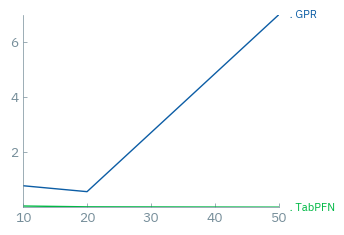

In [23]:
# with plt.style.context(matplotx.styles.dufte):
plt.plot(grouped_res.loc[2, "SMILES", :].index, intersections, label=' . GPR')
plt.plot(grouped_res.loc[2, "SMILES", :].index, intersections_tabpfn, label=' . TabPFN')
matplotx.line_labels(fontsize=8)
add_kappa_vlines(grouped_res.loc[2, "SMILES", :].index, grouped_res.loc[2, "SMILES", :]["kappa"]["mean"])
matplotx.ylabel_top('data efficiency gain  of GPT-SMILES')
plt.xlabel('num training points', labelpad=4)

plt.xscale('log')
plt.savefig('solubility-binary-data-efficiency.pdf', bbox_inches='tight')

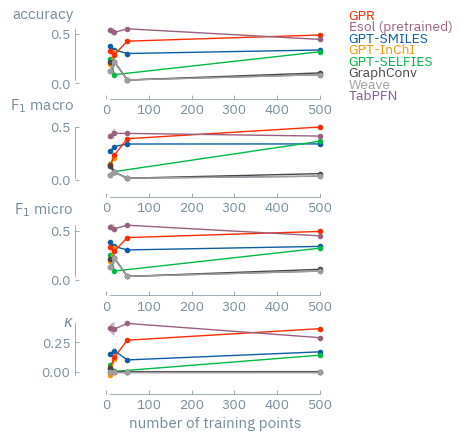

In [27]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "SMILES", :].index,
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        - grouped_res.loc[5, "SMILES", :][metric]["sem"],
        grouped_res.loc[5, "SMILES", :][metric]["mean"]
        + grouped_res.loc[5, "SMILES", :][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_res.loc[5, "SMILES", :].index,
        np.vstack(
            [
                grouped_res.loc[5, "SMILES", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[5, "SELFIES", :][metric]["mean"].values.reshape(-1,1),
                grouped_res.loc[5, "InChI", :][metric]["mean"].values.reshape(-1,1),
                grouped_xgboost_res.loc[5, :][metric]["mean"].values.reshape(-1,1),
                grouped_tabpfn_res.loc[5, :][metric]["mean"].values.reshape(-1,1),
                grouped_graph_conv_res.loc[5, :][metric]["mean"].values.reshape(-1,1),
                grouped_weave_res.loc[5, :][metric]["mean"].values.reshape(-1,1),
                grouped_esol_res.loc[5, :][metric]["mean"].values.reshape(-1,1),
            ]
        ).flatten(),
    )

    ax[i].plot(
        grouped_res.loc[5, "SELFIES", :].index,
        grouped_res.loc[5, "SELFIES", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "SELFIES", :].index,
        grouped_res.loc[5, "SELFIES", :][metric]["mean"]
        - grouped_res.loc[5, "SELFIES", :][metric]["sem"],
        grouped_res.loc[5, "SELFIES", :][metric]["mean"]
        + grouped_res.loc[5, "SELFIES", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, "InChI", :].index,
        grouped_res.loc[5, "InChI", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "InChI", :].index,
        grouped_res.loc[5, "InChI", :][metric]["mean"]
        - grouped_res.loc[5, "InChI", :][metric]["sem"],
        grouped_res.loc[5, "InChI", :][metric]["mean"]
        + grouped_res.loc[5, "InChI", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        - grouped_xgboost_res.loc[5, :][metric]["sem"],
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        + grouped_xgboost_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"] - grouped_tabpfn_res.loc[5, :][metric]["sem"],
        grouped_tabpfn_res.loc[5, :][metric]["mean"] + grouped_tabpfn_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_graph_conv_res.loc[5, :].index,
        grouped_graph_conv_res.loc[5, :][metric]["mean"],
        marker="o",
        label="GraphConv",
    )
    ax[i].fill_between(
        grouped_graph_conv_res.loc[5, :].index,
        grouped_graph_conv_res.loc[5, :][metric]["mean"]
        - grouped_graph_conv_res.loc[5, :][metric]["sem"],
        grouped_graph_conv_res.loc[5, :][metric]["mean"]
        + grouped_graph_conv_res.loc[5, :][metric]["sem"],
        alpha=0.5,
    )

    ax[i].plot(
        grouped_weave_res.loc[5, :].index,
        grouped_weave_res.loc[5, :][metric]["mean"],
        marker="o",
        label="Weave",
    )
    ax[i].fill_between(
        grouped_weave_res.loc[5, :].index,
        grouped_weave_res.loc[5, :][metric]["mean"] - grouped_weave_res.loc[5, :][metric]["sem"],
        grouped_weave_res.loc[5, :][metric]["mean"] + grouped_weave_res.loc[5, :][metric]["sem"],
        alpha=0.5,
    )

    ax[i].plot(
        grouped_esol_res.loc[5, :].index,
        grouped_esol_res.loc[5, :][metric]["mean"],
        marker="o",
        label="Esol (pretrained)",
    )
    ax[i].fill_between(
        grouped_esol_res.loc[5, :].index,
        grouped_esol_res.loc[5, :][metric]["mean"] - grouped_esol_res.loc[5, :][metric]["sem"],
        grouped_esol_res.loc[5, :][metric]["mean"] + grouped_esol_res.loc[5, :][metric]["sem"],
        alpha=0.5,
    )

matplotx.line_labels(ax[0])
ylabel_top("accuracy", ax=ax[0], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], y_pad=0.1, x_pad=0.04)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], y_pad=0.1, x_pad=0.04)
ylabel_top(r"$\kappa$", ax=ax[3], y_pad=0.1, x_pad=0.04)
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
ax[-1].set_xlabel("number of training points", labelpad=4)


fig.savefig("solubility-classification_results_5_class.pdf", bbox_inches="tight")

In [28]:
intersections = []

for i, val in enumerate(grouped_res.loc[5, "SMILES", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[5, "SMILES", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections.append(factor)

intersections_tabpfn = []

for i, val in enumerate(grouped_res.loc[5, "SMILES", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[5, "SMILES", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections_tabpfn.append(factor)

ValueError: x and y must have same first dimension, but have shapes (3,) and (4,)

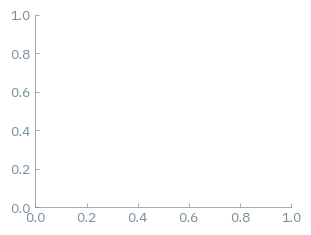

In [29]:
# with plt.style.context(matplotx.styles.dufte):
plt.plot(grouped_res.loc[2, "SMILES", :].index, intersections, label=' . GPR')
plt.plot(grouped_res.loc[2, "SMILES", :].index, intersections_tabpfn, label=' . TabPFN')
matplotx.line_labels(fontsize=8)
add_kappa_vlines(grouped_res.loc[2, "SMILES", :].index, grouped_res.loc[2, "SMILES", :]["kappa"]["mean"])
matplotx.ylabel_top('data efficiency gain  of GPT-SMILES')
plt.xlabel('num training points', labelpad=4)

plt.xscale('log')
plt.savefig('solubility-binary-data-efficiency.pdf', bbox_inches='tight')